### Data science 19098 Python code exercise Assignment 1

**Already had python programming background hence starting the assignment from 12th question

12. Write a Python program to find the n-th term in a Fibonacci series using recursion

In [23]:
def findnfibo(n):
    if n<=0:
        return ("only >0 input possible")
    elif n==1:
        return 0
    elif n==2:
        return 1
    else:
        return findnfibo(n-1)+findnfibo(n-2)

In [28]:
findnfibo(6)

5

13) Write a Python program to find the longest substring between two given strings. You may not
use any package except the substring function but you can make use of recursive function. Here
is the way you will be graded:
import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))
EXAMPLE 1:
STRING 1: "We are currently in lockdown"
STRING 2: "There was a lock on the door"
OUTPUT: " lock"
EXAMPLE 2:
STRING 1: "There is a lady on the mountain with an umbrella"
STRING 2: "I love to look at the mountain when it is snowcapped"
OUTOUT: " the mountain w"

In [44]:
def lngcomstr(s1, s2):
     
    m=len(s1)
    n=len(s2)
    
    table = [[0 for i in range(n + 1)]
                 for j in range(m + 1)]
 
    length = 0

    row, col = 0, 0
 
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                table[i][j] = 0
            elif s1[i - 1] == s2[j - 1]:
                table[i][j] = table[i - 1][j - 1] + 1
                if length < table[i][j]:
                    length = table[i][j]
                    row = i
                    col = j
            else:
                table[i][j] = 0
 
    if length == 0:
        print("No Common Substring")
        return
 
    resultStr = ['x'] * length
#     print(length, row, col,m,n)
 
    while table[row][col] != 0:
        length -= 1
        resultStr[length] = s1[row - 1]
        row -= 1
        col -= 1
 
    print(''.join(resultStr))
#     print(table)
 

In [48]:
lngcomstr("We are currently in lockdown", "There was a lock on the door")

 lock


In [47]:
lngcomstr("There is a lady on the mountain with an umbrella", "I love to look at the mountain when it is snowcapped")

 the mountain w


14) Write a Python program which accepts basic mathematical expressions from console and print
the evaluation result.
EXAMPLE:
INPUT: 35 + 3 * 2
OUTPUT: 41

In [49]:
def f(str_input):
    return eval(str_input)

f('35+3*2')

41

15) Read the loan data file into a dataframe and then compute the following:
• mean and variance of the Age column,
• correlation coefficient between the two numerical columns Age and Time_at_address,
• the conditional probability p(Decision = reject | Occupation = Unemployed),
• frequency of values in the Job-status column and then draw a bar diagram using matplotlib

In [1]:
import os
os.getcwd()

'/Users/shubhamgoyal'

In [2]:
os.chdir('/Users/shubhamgoyal/Downloads')
os.getcwd()

'/Users/shubhamgoyal/Downloads'

In [3]:
import pandas as pd

loan_data=pd.read_excel('loan.xlsx')
loan_data.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


Mean and variance of age column

In [6]:
age_mean= loan_data.Age.mean()
age_variance= loan_data.Age.var()
print( age_mean,age_variance)

31.51016316713987 140.27074594116948


Correlation cofficient b/w age and time_at_adderss

In [50]:
loan_data[['Age','Time_at_address']].corr()

,Age,Time_at_address
Age,1.000000,0.217342
Time_at_address,0.217342,1.000000


the conditional probability p(Decision = reject | Occupation = Unemployed),

In [62]:
loan_data[(loan_data.Occupation=='unemploye') & (loan_data.Decision=='reject')].shape[0]/loan_data[loan_data.Decision=='reject'].shape[0]

0.10970464135021098

• frequency of values in the Job-status column and then draw a bar diagram using matplotlib

In [89]:
freq_job_stat=loan_data.Job_status.value_counts()
freq_job_stat

private_s    265
governmen     82
self_empl     37
unemploye     31
retired        8
student        5
military       1
Name: Job_status, dtype: int64

([<matplotlib.axis.XTick at 0x7ff4803d5730>,
 [Text(0, 0, 'private_s'),
  Text(1, 0, 'governmen'),
  Text(2, 0, 'self_empl'),
  Text(3, 0, 'unemploye'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'student'),
  Text(6, 0, 'military')])

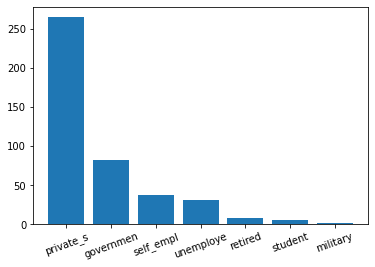

In [101]:
import matplotlib.pyplot as plt

plt.bar(freq_job_stat.index.tolist(),freq_job_stat.tolist())
plt.xticks(range(len(freq_job_stat.tolist())), freq_job_stat.index.tolist(),rotation=20)

16) Suppose the loan data file provides some examples of applications to accept or reject, as
specified in the Decision column N, given the input background info in columns A-M. Come up
with various ways to find out the degree of relevance between each input “categorical” column
of A-M and the Decision column N. (hint. Chi-Square Test of Independence and Mutual
Information)

In [243]:
loan_data.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [112]:
loan_data.dtypes

Sex                 object
Age                float64
Time_at_address    float64
Res_status          object
Telephone           object
Occupation          object
Job_status          object
Time_employed        int64
Time_bank            int64
Liab_ref            object
Acc_ref             object
Home_Expn            int64
Balance              int64
Decision            object
dtype: object

In [138]:
from sklearn.preprocessing import LabelEncoder

loan_data1=loan_data.apply(LabelEncoder().fit_transform)
loan_data1.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,1,242,17,0,0,11,6,0,0,0,0,37,0,1
1,1,31,130,1,1,4,0,0,0,1,0,34,0,1
2,0,248,162,0,0,0,2,5,13,0,0,0,136,0
3,1,59,61,1,1,0,0,2,0,0,0,0,0,0
4,1,119,154,0,0,1,0,0,0,0,0,63,0,1


In [149]:
cat_vars=['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref']

loan_data2=loan_data1[cat_vars]
loan_data2.shape

(429, 7)

In [150]:
from sklearn.feature_selection import chi2

X = loan_data2
y = loan_data1['Decision']

chi_scores = chi2(X,y)
chi_scores

(array([ 0.38129717,  6.42418317,  6.42418317,  0.34708116, 18.73208598,
         1.09354919,  4.50183748]),
 array([5.36909830e-01, 1.12576677e-02, 1.12576677e-02, 5.55770084e-01,
        1.50429866e-05, 2.95686159e-01, 3.38584519e-02]))

<AxesSubplot:>

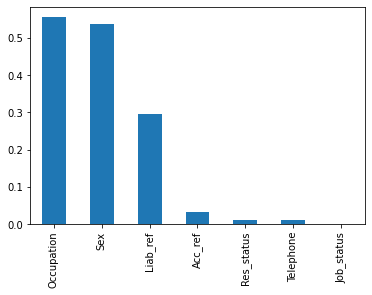

In [151]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [154]:
#since the below variables have p value less than 0.05 we can say there is a
# dependency between these variables and the decision variable
p_values[p_values<0.05]

Acc_ref       0.033858
Res_status    0.011258
Telephone     0.011258
Job_status    0.000015
dtype: float64

In [155]:
#whereas the below variables are independent of Decision variable
p_values[p_values>=0.05]


Occupation    0.555770
Sex           0.536910
Liab_ref      0.295686
dtype: float64

17) Define a class, called Lunch, with __init__() method should have two arguments, self and menu,
where menu is a string. Add a method called menu_price. It will involve an if statement: if
"menu 1" then print "Price 12.00", if "menu 2" then print "Price 13.40", else print "Error in
menu". Test with Paul = Lunch("menu 1") and call Paul.menu_price().

In [46]:
class Lunch:
    def __init__(self,menu):
        
        self.menu=menu
        
    def menu_price(self):
        if self.menu=="menu 1":
            print("Price 12.00")
        elif self.menu=="menu 2":
            print("Price 13.40")
        else:
            "Error in menu"
            
Paul=Lunch("menu 1")
Paul.menu_price()

Price 12.00


18) In the Kaggle insurance data set (https://www.kaggle.com/c/prudential-life-insurance-
assessment/data), the Response column is the output variable and the rest are input variables.
Perform the following:
• Fill in the missing values applying an appropriate technique.
• Make use of the insurance data set to explore the multicollinearity among the input
variables.
• Single out three input variables that are most relevant to predicting the output variable.

In [103]:
os.getcwd()

'/Users/shubhamgoyal/Downloads'

In [105]:
os.chdir('/Users/shubhamgoyal/Downloads/prudential-life-insurance-assessment')
os.getcwd()

'/Users/shubhamgoyal/Downloads/prudential-life-insurance-assessment'

In [249]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [250]:
train_data=train_data.set_index('Id')
test_data=test_data.set_index('Id')

In [251]:
train_data.shape,test_data.shape

((59381, 127), (19765, 126))

In [252]:
pd.set_option('display.max_columns', 500)
train_data.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2

In [254]:
#numeric and categorical columns as mentioned on data page (kaggle competition)

cat_cols=['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_5','Product_Info_6','Product_Info_7',
'Employment_Info_2','Employment_Info_3','Employment_Info_5','InsuredInfo_1','InsuredInfo_2','InsuredInfo_3',
'InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7','Insurance_History_1','Insurance_History_2',
'Insurance_History_3','Insurance_History_4','Insurance_History_7','Insurance_History_8','Insurance_History_9',
'Family_Hist_1','Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5',
'Medical_History_6','Medical_History_7',
'Medical_History_8','Medical_History_9','Medical_History_11','Medical_History_12','Medical_History_13',
'Medical_History_14','Medical_History_16','Medical_History_17','Medical_History_18','Medical_History_19',
'Medical_History_20','Medical_History_21','Medical_History_22','Medical_History_23','Medical_History_25',
'Medical_History_26','Medical_History_27','Medical_History_28','Medical_History_29','Medical_History_30',
'Medical_History_31','Medical_History_33','Medical_History_34','Medical_History_35','Medical_History_36',
'Medical_History_37','Medical_History_38','Medical_History_39','Medical_History_40','Medical_History_41',]

# dummy_vars=

# num_cols = train_data._get_numeric_data().columns

# print(num_cols)

num_cols=list(set(train_data.columns) - set(cat_cols))
# num_cols

In [256]:
#checking columns with missing values
percent_missing = train_data.isna().sum() * 100 / len(train_data)
missing_value_df = pd.DataFrame({'column_name': train_data.columns,
                                 'percent_missing': percent_missing})

In [257]:
missing_value_df[missing_value_df.percent_missing>0]

,column_name,percent_missing
Employment_Info_1,Employment_Info_1,0.031997
Employment_Info_4,Employment_Info_4,11.416110
Employment_Info_6,Employment_Info_6,18.278574
Insurance_History_5,Insurance_History_5,42.767889
Family_Hist_2,Family_Hist_2,48.257860
Family_Hist_3,Family_Hist_3,57.663226
Family_Hist_4,Family_Hist_4,32.306630
Family_Hist_5,Family_Hist_5,70.411411
Medical_History_1,Medical_History_1,14.969435
Medical_History_10,Medical_History_10,99.061990


In [258]:
missing_cols=missing_value_df[missing_value_df.percent_missing>0].index
missing_cols

Index(['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
       'Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'],
      dtype='object')

In [259]:
# The above listed variables have been identified having missing values, while there are some variables which have
# very low missing percentage, majority of them have very high missing rates which can be dropped as 
# high imputation might cause change in the distributions. I'll be dropping variables with >40% missing rates
# and imputing missing values for other variables using iterative imputation method

In [260]:
del_cols_missing = ['Insurance_History_5','Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5',
                    'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

train_data_upd= train_data.drop(del_cols_missing,axis=1)
test_data_upd=test_data.drop(del_cols_missing,axis=1)


In [261]:
impute_cols = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
                 'Family_Hist_4','Medical_History_1']

In [262]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# creating a subset of train and test where imputation is required
train_data_pre_imp= train_data_upd[impute_cols]
test_data_pre_imp=test_data_upd[impute_cols]

#data set with remaining variables
train_data_rem = train_data_upd.drop(impute_cols, axis=1)
test_data_rem = test_data_upd.drop(impute_cols, axis=1)

imputer = IterativeImputer(random_state=0)

# imputing values
train_data_post_imp= pd.DataFrame(imputer.fit_transform(train_upd_pre_impute), columns=impute_cols)
test_data_post_imp= pd.DataFrame(imputer.fit_transform(test_upd_pre_impute), columns=impute_cols)

# ensuring index doesn't change
train_data_post_imp.index = train_data_pre_imp.index
test_data_post_imp.index = test_data_pre_imp.index

# Re-joining the imputed columns with the remaining columns in each dataset
train_data_imp = pd.concat([train_data_rem, train_data_post_imp], axis=1)
test_data_imp = pd.concat([test_data_rem, test_data_post_imp], axis=1)


In [263]:
train_data_imp.shape,test_data_imp.shape

((59381, 119), (19765, 118))

In [264]:
#checking missing values again

percent_missing = train_data_imp.isna().sum() * 100 / len(train_data_imp)
missing_value_df = pd.DataFrame({'column_name': train_data_imp.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df.percent_missing>0]

,column_name,percent_missing


In [265]:
train_data[impute_cols].describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1
count,59362.000000,52602.000000,48527.000000,40197.000000,50492.000000
mean,0.077582,0.006283,0.361469,0.444890,7.962172
std,0.082347,0.032816,0.349551,0.163012,13.027697
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000,0.323944,2.000000
50%,0.060000,0.000000,0.250000,0.422535,4.000000
75%,0.100000,0.000000,0.550000,0.563380,9.000000
max,1.000000,1.000000,1.000000,0.943662,240.000000


In [266]:
train_data_imp[impute_cols].describe()
#distributions are not affected much with the imputations

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,0.077583,0.006301,0.347528,0.453762,8.020663
std,0.082335,0.030961,0.325838,0.142332,12.020361
min,0.000000,-0.005676,-0.230829,0.000000,0.000000
25%,0.035000,0.000000,0.080000,0.366197,2.000000
50%,0.060000,0.000000,0.250000,0.440202,5.000000
75%,0.100000,0.000000,0.500000,0.549296,9.044058
max,1.000000,1.000000,2.140545,1.006113,240.000000


In [267]:
num_cols_upd=list(set(train_data_imp.columns) - set(cat_cols))

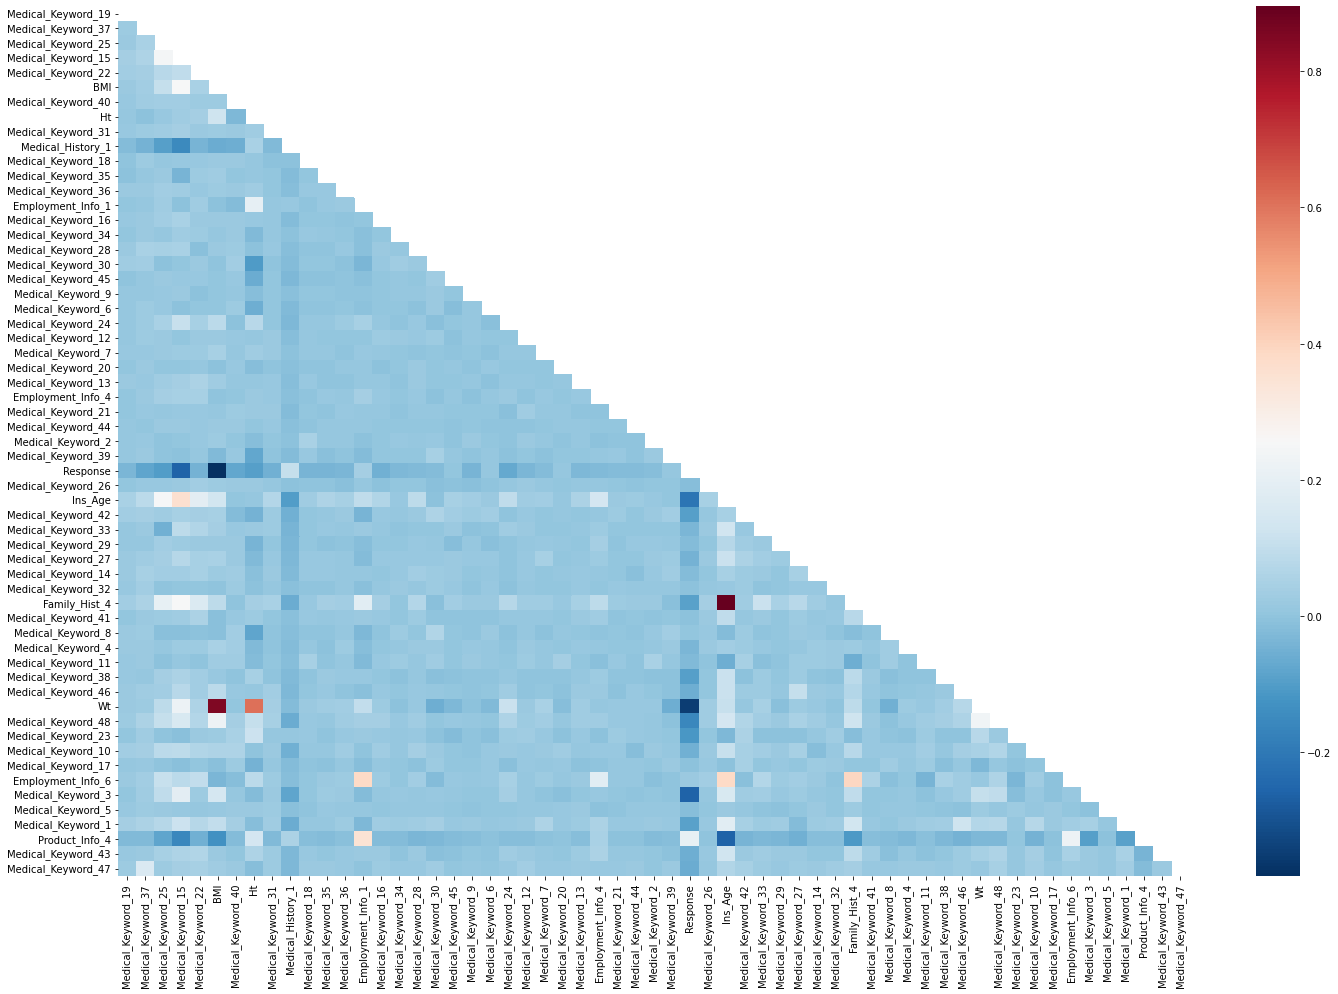

In [280]:
#conducting an initial check on correlation between variables
import seaborn as sns
import numpy as np

corrs = train_data[num_cols_upd].corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

# Convert the correlation matrix into a heatmap using Seaborn.
plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()

# we can observe high positive correlation between Ins_age and Family_hist_4, and Wt & BMI

#there is negative correlation between response and bmi 

In [270]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

vif_data = pd.DataFrame()
vif_data["feature"] = train_data_imp[num_cols_upd].columns
vif_data["VIF"] = [variance_inflation_factor(train_data_imp[num_cols_upd].values, i) for i in range(len(train_data_imp[num_cols_upd].columns))]

In [271]:
vif_data[vif_data.VIF>10].sort_values('VIF',ascending=False)
#high vif indicates high correlation with other variables, here we can observe wt, BMI, ht etc have high vif
# values and hence have high correlation which makes intuitive sense as well.

,feature,VIF
47,Wt,73.650012
5,BMI,57.805404
7,Ht,53.498149
40,Family_Hist_4,25.245154
33,Ins_Age,13.432020


In [272]:
#one hot encoding product_info_2 var as it is string categorical variable

from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
col_enc = ['Product_Info_2']

# Use the one-hot encoder to transform the categorical data columns. 
train_data_enc = pd.DataFrame(OH_encoder.fit_transform(train_data_imp[col_enc]))
test_data_enc = pd.DataFrame(OH_encoder.transform(test_data_imp[col_enc]))

#reassigning the original index.
train_data_enc.index = train_data_imp.index
test_data_enc.index = test_data_imp.index

# Addings columns as per the encoding 
train_data_enc.columns = OH_encoder.get_feature_names(col_enc)
test_data_enc.columns = OH_encoder.get_feature_names(col_enc)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
train_data_no_enc = train_data_imp.drop(col_enc, axis=1)
test_data_no_enc = test_data_imp.drop(col_enc, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
train_data_imp_enc = pd.concat([train_data_no_enc, train_data_enc], axis=1)
test_data_imp_enc = pd.concat([test_data_no_enc, test_data_enc], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [273]:
print(train_data_imp.shape,train_data_imp_enc.shape)
print(test_data_imp.shape,test_data_imp_enc.shape)

(59381, 119) (59381, 137)
(19765, 118) (19765, 136)


In [274]:
train_data_imp_enc.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_2,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Employment_Info_1,Employment_Info_4,Employment_Info_6,Family_Hist_4,Medical_History_1,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,12,1,3,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.028,0.0,0.261318,0.436869,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,1,3,2,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.000,0.0,0.001800,0.084507,5.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,9,1,2,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.030,0.0,0.030000,0.225352,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,9,1,3,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0.042,0.0,0.200000,0.35211

In [275]:
#mutual information test for choosing important variables

from sklearn.feature_selection import mutual_info_classif

def mut_info_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [276]:
mi_scores_train = mut_info_scores(train_data_imp_enc.drop('Response',axis=1), train_data_imp_enc['Response'])


In [277]:
mi_scores_train

BMI                   0.223274
Wt                    0.150555
Medical_History_4     0.077837
Medical_History_23    0.076210
Medical_Keyword_15    0.073590
                        ...   
Medical_Keyword_45    0.000000
Medical_Keyword_44    0.000000
Medical_Keyword_43    0.000000
Medical_Keyword_20    0.000000
Medical_Keyword_5     0.000000
Name: MI Scores, Length: 136, dtype: float64

In [279]:
#from an initial test of mutual information we can observe that BMI, Wt, Medical_History_4 and Medical_Keyword_23
# have dependencies with the response variable and can add significant statiscal value in prediction.